In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("ViratK_analysis.csv")
df.head()

,No.,Runs,Against,Position,Innings,Stadium,Place,Ground,Date.2,Result,Out/NotOut
0,1,107,Sri Lanka,4,2,Eden Gardens,Kolkata,Home,2009,Won,Out
1,2,102,Bangladesh,3,2,Sher-e-Bangla Cricket Stadium,Dhaka,Away,2010,Won,NotOut
2,3,118,Australia,3,2,APCA-VDCA Stadium,Visakhapatnam,Home,2010,Won,Out
3,4,105,New Zealand,3,1,Nehru Stadium,Guwahati,Home,2010,Won,Out
4,5,100,Bangladesh,4,1,Sher-e-Bangla Cricket Stadium,Dhaka,Away,2011,Won,NotOut


In [5]:
df.shape

(75, 11)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No.         75 non-null     int64 
 1   Runs        75 non-null     int64 
 2   Against     75 non-null     object
 3   Position    75 non-null     int64 
 4   Innings     75 non-null     int64 
 5   Stadium     75 non-null     object
 6   Place       75 non-null     object
 7   Ground      75 non-null     object
 8   Date.2      75 non-null     int64 
 9   Result      75 non-null     object
 10  Out/NotOut  75 non-null     object
dtypes: int64(5), object(6)
memory usage: 6.6+ KB


In [45]:
df.drop(["No.","Date.2"],axis=1,inplace=True)


In [46]:
df.describe()

,Runs,Position,Innings
count,75.0000,75.000000,75.000000
mean,132.8000,3.520000,1.706667
std,35.8337,0.664953,0.673300
min,100.0000,2.000000,1.000000
25%,107.0000,3.000000,1.000000
50%,119.0000,3.000000,2.000000
75%,140.5000,4.000000,2.000000
max,254.0000,6.000000,4.000000


# EDA_ViratK

In [103]:
df.sort_values("Runs")

,Runs,Against,Position,Innings,Stadium,Place,Ground,Result,Out/NotOut
4,100,Bangladesh,4,1,Sher-e-Bangla Cricket Stadium,Dhaka,Away,Won,NotOut
19,100,Australia,3,2,Sawai Mansingh Stadium,Jaipur,Home,Won,NotOut
1,102,Bangladesh,3,2,Sher-e-Bangla Cricket Stadium,Dhaka,Away,Won,NotOut
17,102,West Indies,3,1,Queen's Park Oval,Port of Spain,Away,Won (D/L),Out
57,103,England,4,3,Trent Bridge,Nottingham,Away,Won,Out
...,...,...,...,...,...,...,...,...,...
37,211,New Zealand,4,1,Holkar Stadium,Indore,Home,Won,Out
50,213,Sri Lanka,4,2,Vidarbha Cricket Association Stadium,Nagpur,Home,Won,Out
40,235,England,4,2,Wankhede Stadium,Mumbai,Home,Won,Out
51,243,Sri Lanka,4,1,Feroz Shah Kotla Ground,Delhi,Home,Drawn,Out


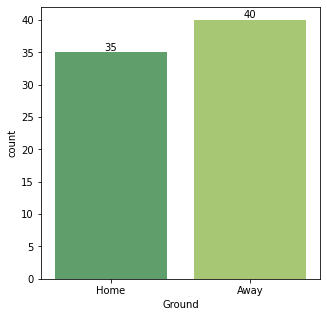

In [11]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Ground",palette="summer")
ax.bar_label(ax.containers[0])
plt.show()

From the above chart we can conclude that Virat plays better at international grounds over domestic

In [105]:
a=df.groupby("Place").sum()
print(a)

                    Runs  Position  Innings
Place                                      
Adelaide             583        20       11
Ahmedabad            186         4        2
Bangalore            103         5        2
Birmingham           149         4        2
Canberra             106         3        2
Cape Town            160         3        1
Cardiff              107         4        1
Centurion            282         7        4
Chennai              245         8        3
Chittagong           113         3        1
Colombo              369         9        5
Delhi                355         8        3
Dhaka                493        13        6
Dharamshala          127         3        1
Dubai                122         2        1
Durban               112         3        2
Fatullah             136         3        2
Galle                206         8        5
Guwahati             358         9        4
Hambantota           106         3        1
Harare               115        

In [16]:
gb=df.groupby("Place").agg({"Runs":"mean","Innings":"max"}).round(2)
print(gb)

                      Runs  Innings
Place                              
Adelaide            116.60        4
Ahmedabad           186.00        2
Bangalore           103.00        2
Birmingham          149.00        2
Canberra            106.00        2
Cape Town           160.00        1
Cardiff             107.00        1
Centurion           141.00        2
Chennai             122.50        2
Chittagong          113.00        1
Colombo             123.00        2
Delhi               177.50        2
Dhaka               123.25        2
Dharamshala         127.00        1
Dubai               122.00        1
Durban              112.00        2
Fatullah            136.00        2
Galle               103.00        3
Guwahati            119.33        2
Hambantota          106.00        1
Harare              115.00        2
Hobart              133.00        2
Hyderabad           204.00        1
Indore              211.00        1
Jaipur              100.00        2
Johannesburg        119.00  

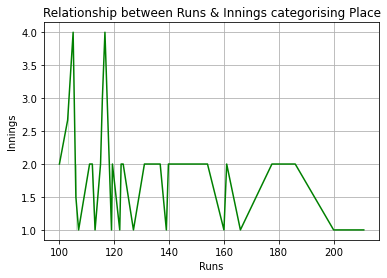

In [38]:
sns.lineplot(x="Runs",y="Innings",data=gb,markers=["o"],color="Green",markersize=10)
plt.grid()
plt.title("Relationship between Runs & Innings categorising Place")

plt.show()


Though Virat plays best when Away(International ground) from home, but the best of his average score is at Domestic ground only namely Indore and Hyderabad

In [13]:
gbb=df.groupby("Result").agg({"Runs":"mean","Innings":"max"}).round(2)
print(gbb)

              Runs  Innings
Result                     
Drawn       148.11        4
Lost        122.85        4
Lost (D/L)  107.00        1
Won         133.75        3
Won (D/L)   102.00        1


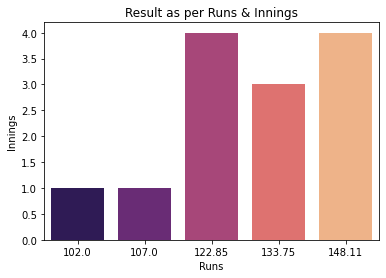

In [14]:
sns.barplot(data=gbb,x="Runs",y="Innings",palette="magma")
plt.title("Result as per Runs & Innings")
plt.show()

The analysis above states that whenever Virat is close to scoring  an average of 150 runs the match is mostly drawn

In [8]:
gbbb=df.groupby("Out/NotOut").agg({"Runs":"mean","Position":"max"}).round(2)
print(gbbb)

              Runs  Position
Out/NotOut                  
NotOut      129.43         4
Out         134.11         6


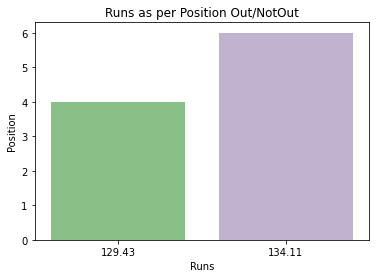

In [23]:
sns.barplot(data=gbbb,x="Runs",y="Position",palette="Accent")
plt.title("Runs as per Position Out/NotOut")
plt.show()